## NLP for high-schoolers, Class 1

In this class we will learn about the NLTK (Natural Language Tool Kit) package. You should take a look at http://www.nltk.org/.

Copy pasting from their website:

<i>NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum</i>

NLTK is also available as a text book for classes like this, please see http://www.nltk.org/book/ch01.html.

Load NLTK package, this could take a while when done for the first time.

<b>Uncomment the "nltk.download" line if this is your first time running this notebook after installing NLTK.</b>

In [99]:
%matplotlib inline  
import nltk
# nltk.download()
from nltk.book import *

The text of the following books is available as "tokenized" Python arrays. What does this mean?

In [100]:
 nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

### We will learn to explore (tokenized text corpus)

1. We will do some data cleaning.

2. Explore word frequencies.

3. Use basic statistics to compare correlation between text of two separate authors.

Lets explore Jane Austen's books, lets start with Emma.

In [102]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

Here are the words in emma.

In [103]:
len(emma)

192427

Of course, this does not tell us anything much, but it certainly could. Remember we are still in word land, how do we get to number land?

In [104]:
# create a frequency distribution of all the words in the text
fdist5 = FreqDist(emma)
fdist5

FreqDist({'[': 2,
          'Emma': 865,
          'by': 558,
          'Jane': 301,
          'Austen': 1,
          '1816': 1,
          ']': 1,
          'VOLUME': 3,
          'I': 3178,
          'CHAPTER': 55,
          'Woodhouse': 313,
          ',': 11454,
          'handsome': 37,
          'clever': 27,
          'and': 4672,
          'rich': 14,
          'with': 1187,
          'a': 3004,
          'comfortable': 34,
          'home': 130,
          'happy': 122,
          'disposition': 24,
          'seemed': 141,
          'to': 5183,
          'unite': 3,
          'some': 248,
          'of': 4279,
          'the': 4844,
          'best': 85,
          'blessings': 6,
          'existence': 8,
          ';': 2199,
          'had': 1606,
          'lived': 25,
          'nearly': 14,
          'twenty': 30,
          '-': 574,
          'one': 413,
          'years': 57,
          'in': 2118,
          'world': 81,
          'very': 1151,
          'little': 354,
    

In [105]:
# lookup frequency from the frequency distribution determined above..and
# arrange the distribution in decreasing order of frequency
sorted_freq_count = sorted(((w,fdist5[w]) for w in set(emma)), key=lambda item : item[1] , reverse = True)

print("====================================================================================================")
print("Printing a sorted frequency distribution of four letter words, with most frequent words listed first")
print("====================================================================================================")

sorted_freq_count

Printing a sorted frequency distribution of four letter words, with most frequent words listed first


[(',', 11454),
 ('.', 6928),
 ('to', 5183),
 ('the', 4844),
 ('and', 4672),
 ('of', 4279),
 ('I', 3178),
 ('a', 3004),
 ('was', 2385),
 ('her', 2381),
 (';', 2199),
 ('it', 2128),
 ('in', 2118),
 ('not', 2101),
 ('"', 2004),
 ('be', 1970),
 ('she', 1778),
 ('that', 1730),
 ('you', 1677),
 ('had', 1606),
 ('as', 1387),
 ('--', 1382),
 ('he', 1365),
 ('for', 1321),
 ('have', 1301),
 ('is', 1220),
 ('with', 1187),
 ('Mr', 1153),
 ('very', 1151),
 ('but', 1148),
 ('."', 1138),
 ('his', 1088),
 ("'", 1007),
 ('at', 997),
 ('s', 933),
 ('so', 924),
 ('Emma', 865),
 ('all', 835),
 ('could', 825),
 ('would', 815),
 ('been', 759),
 ('him', 758),
 ('Mrs', 699),
 ('.--', 685),
 ('on', 677),
 ('any', 651),
 ('my', 619),
 ('no', 616),
 ('Miss', 592),
 ('were', 591),
 ('do', 580),
 ('-', 574),
 ('me', 564),
 ('must', 564),
 ('She', 562),
 ('will', 559),
 ('by', 558),
 ('which', 552),
 ('!', 549),
 ('from', 535),
 ('Harriet', 506),
 ('or', 490),
 ('said', 484),
 ('much', 478),
 ('more', 464),
 ('an',

Ok, was that helpful? Why? Why not?

So we need to do a few things (data cleaning) for all this to start making sense.

1. We need to delete punctuations.

2. We need to delete <i>stopwords</i>.

  2.1 Before we delete stopwords we need to convert everything to lowercase.

In [106]:
# fortunately nltk has a stopwords corpus built in
from nltk.corpus import stopwords 

# Python has a string package which has a list of punctuations
import string

# we use list comprehensions a lot (functional programming everywhere)
# convert all words to lowercase
emma = [w.lower() for w in emma]

# load stop words, the set function makes a set/list of unique
# values from a list
stop_words = set(stopwords.words('english')) 
  
# we are interested in anything that is not a stopword AND not a punctuations
emma = [w for w in emma if w not in stop_words and w not in string.punctuation]

We have the clean data now, lets do the frequency distribution again and see what we got now.

In [107]:
# create a frequency distribution of all the words in the text
fdist5 = FreqDist(emma)

# for all unique words in text5, filter out 4 letter words, then lookup their 
# frequency from the frequency distribution determined above..finally
# arrange the distribution in decreasing order of frequency
sorted_freq_count = sorted(((w,fdist5[w]) for w in set(emma)), key=lambda item : item[1] , reverse = True)

print("====================================================================================================")
print("Printing a sorted frequency distribution of four letter words, with most frequent words listed first")
print("====================================================================================================")

sorted_freq_count

Printing a sorted frequency distribution of four letter words, with most frequent words listed first


[('--', 1382),
 ('mr', 1153),
 ('."', 1138),
 ('emma', 865),
 ('could', 837),
 ('would', 820),
 ('mrs', 699),
 ('.--', 685),
 ('miss', 599),
 ('must', 567),
 ('harriet', 506),
 ('much', 486),
 ('said', 484),
 ('one', 452),
 ('weston', 440),
 ('every', 435),
 (',"', 421),
 ('well', 401),
 ('thing', 398),
 ('knightley', 389),
 ('elton', 385),
 ('think', 383),
 ('little', 359),
 ('never', 358),
 ('good', 358),
 ('!--', 338),
 ('know', 337),
 ('might', 326),
 ('woodhouse', 313),
 ('say', 310),
 ('jane', 301),
 ('quite', 282),
 ('time', 279),
 ('great', 264),
 ('nothing', 256),
 ('fairfax', 241),
 ('dear', 241),
 ('always', 238),
 ('man', 235),
 ('?"', 230),
 ('thought', 226),
 ('churchill', 224),
 ('soon', 224),
 ('see', 222),
 ('may', 221),
 ('shall', 217),
 ('without', 214),
 ('first', 209),
 ('frank', 208),
 ('father', 207),
 ('sure', 204),
 ('indeed', 202),
 ('?--', 200),
 ('like', 200),
 ('made', 199),
 ('body', 193),
 ('oh', 193),
 ('ever', 193),
 ('young', 192),
 ('day', 192),
 ('tw

Almost there, lets remove some more nuisance words.

In [108]:
nuisance_words = ['--', '."', '.--', ',"', '!--', ';"', '?--', '?"', ';--']
# we are interested in anything that is not a stopword AND not a punctuations
emma = [w for w in emma if w not in nuisance_words]

# time to make a function out of this
def get_freq_dist(corpus):    
    # create a frequency distribution of all the words in the text
    fdist5 = FreqDist(corpus)

    # for all unique words in text5, filter out 4 letter words, then lookup their 
    # frequency from the frequency distribution determined above..finally
    # arrange the distribution in decreasing order of frequency
    sorted_freq_count = sorted(((w,fdist5[w]) for w in set(corpus)), key=lambda item : item[1] , reverse = True)

    print("====================================================================================================")
    print("Printing a sorted frequency distribution of words, with most frequent words listed first")
    print("====================================================================================================")

    return sorted_freq_count

sorted_freq_count = get_freq_dist(emma)
sorted_freq_count

Printing a sorted frequency distribution of words, with most frequent words listed first


[('mr', 1153),
 ('emma', 865),
 ('could', 837),
 ('would', 820),
 ('mrs', 699),
 ('miss', 599),
 ('must', 567),
 ('harriet', 506),
 ('much', 486),
 ('said', 484),
 ('one', 452),
 ('weston', 440),
 ('every', 435),
 ('well', 401),
 ('thing', 398),
 ('knightley', 389),
 ('elton', 385),
 ('think', 383),
 ('little', 359),
 ('never', 358),
 ('good', 358),
 ('know', 337),
 ('might', 326),
 ('woodhouse', 313),
 ('say', 310),
 ('jane', 301),
 ('quite', 282),
 ('time', 279),
 ('great', 264),
 ('nothing', 256),
 ('fairfax', 241),
 ('dear', 241),
 ('always', 238),
 ('man', 235),
 ('thought', 226),
 ('churchill', 224),
 ('soon', 224),
 ('see', 222),
 ('may', 221),
 ('shall', 217),
 ('without', 214),
 ('first', 209),
 ('frank', 208),
 ('father', 207),
 ('sure', 204),
 ('indeed', 202),
 ('like', 200),
 ('made', 199),
 ('body', 193),
 ('oh', 193),
 ('ever', 193),
 ('young', 192),
 ('day', 192),
 ('two', 178),
 ('friend', 177),
 ('though', 177),
 ('better', 173),
 ('come', 172),
 ('hartfield', 160),
 (

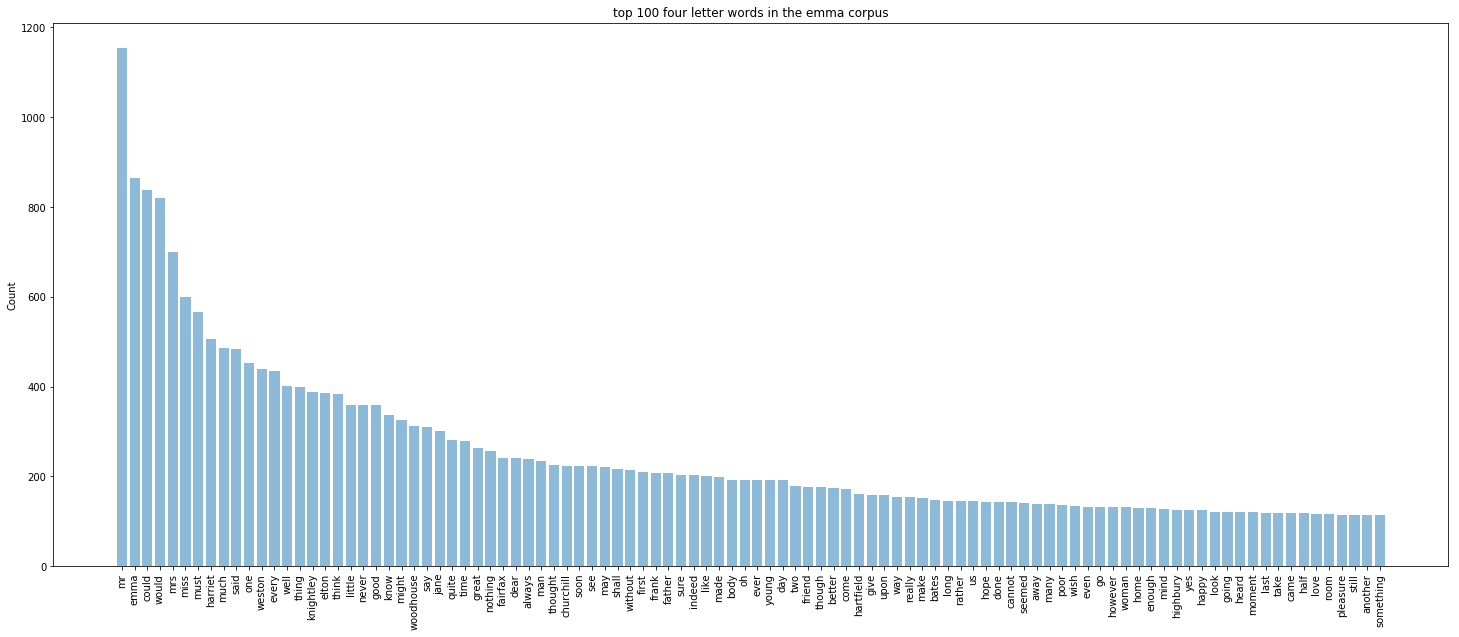

In [109]:
# visualization is better than just printing out a table
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10

top_n = 100
objects = [item[0] for item in sorted_freq_count[:top_n]]

y_pos = np.arange(len(objects))
performance = [item[1] for item in sorted_freq_count[:top_n]]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Count')
plt.title('top %d four letter words in the emma corpus' %(top_n))
 
plt.show()

Ok that was useful. What would be even more useful if we could do this for all her writings.

In [110]:
# read all files and store in "janeausten"
janeausten = [nltk.corpus.gutenberg.words(f) for f in ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt']]
#janeausten is a list of list i.e. each book is a list, we need to flatten
# this list of list
#flatten the lists
janeausten = [y for x in janeausten for y in x]
janeausten

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 '-',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 '

We play the same game, get a frequency distribution and plot it.

In [111]:
# convert to lowercase
janeausten = [w.lower() for w in janeausten]

# some additional stop words
additional_stop_words = ['could', 'would']

# we are interested in anything that is not a stopword AND not a punctuations
janeausten = [w for w in janeausten if w not in stop_words and 
              w not in additional_stop_words and
              w not in string.punctuation]

nuisance_words = ['--', '."', '.--', ',"', '!--', ';"', '?--', '?"', ';--']
# we are interested in anything that is not a stopword AND not a punctuations
janeausten = [w for w in janeausten if w not in nuisance_words]

sorted_freq_count_ja = get_freq_dist(janeausten)
sorted_freq_count_ja

Printing a sorted frequency distribution of words, with most frequent words listed first


[('mr', 1587),
 ('mrs', 1520),
 ('must', 1078),
 ('said', 1054),
 ('one', 1021),
 ('much', 981),
 ('miss', 934),
 ('every', 914),
 ('emma', 866),
 ('well', 804),
 ('think', 742),
 ('good', 722),
 ('might', 707),
 ('never', 702),
 ('know', 696),
 ('little', 695),
 ('elinor', 685),
 ('time', 670),
 ('thing', 624),
 ('nothing', 584),
 ('marianne', 566),
 ('say', 563),
 ('great', 543),
 ('soon', 527),
 ('see', 518),
 ('though', 510),
 ('anne', 506),
 ('harriet', 506),
 ('without', 496),
 ('man', 490),
 ('quite', 487),
 ('may', 483),
 ('first', 482),
 ('always', 472),
 ('two', 445),
 ('weston', 440),
 ('ever', 440),
 ('made', 433),
 ('thought', 432),
 ('lady', 431),
 ('day', 419),
 ('dear', 415),
 ('sure', 413),
 ('shall', 402),
 ('sister', 397),
 ('knightley', 389),
 ('elton', 385),
 ('make', 380),
 ('young', 379),
 ('however', 375),
 ('mother', 372),
 ('indeed', 365),
 ('give', 364),
 ('like', 364),
 ('father', 354),
 ('house', 350),
 ('come', 349),
 ('long', 345),
 ('better', 338),
 ('si

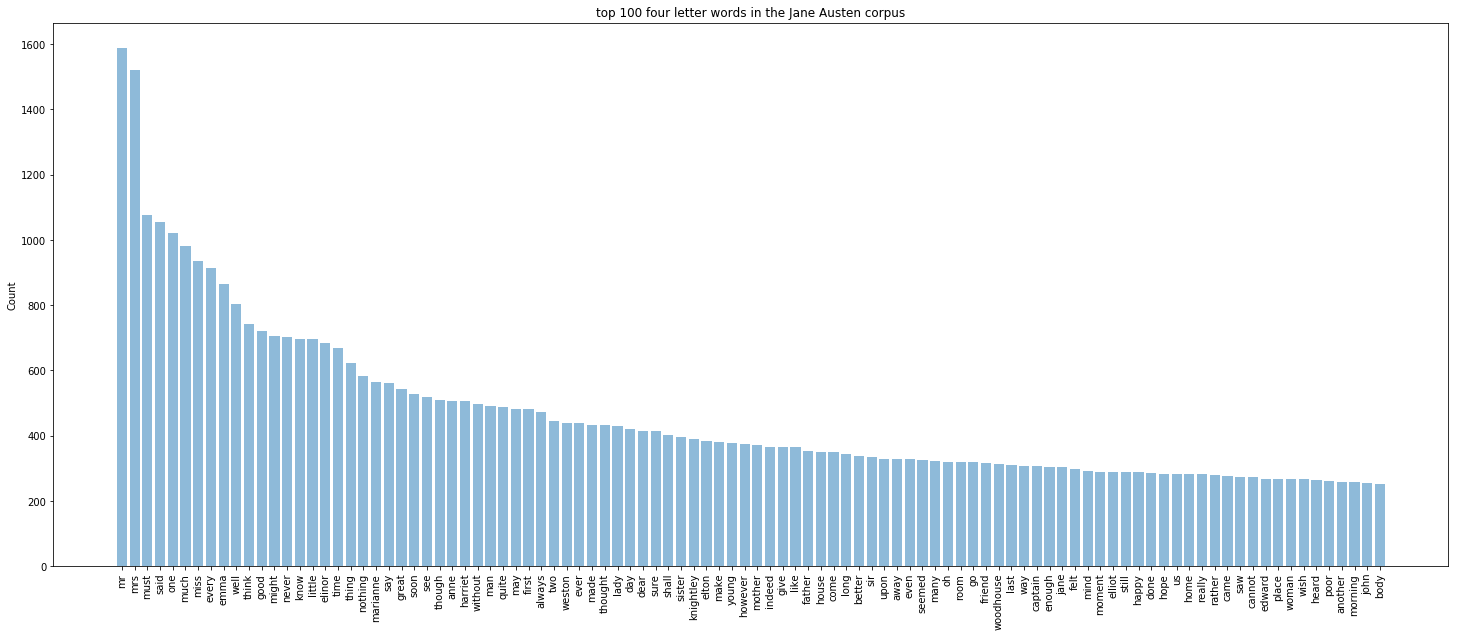

In [112]:
def word_freq_as_bar_plot(sorted_freq_count, label, top_n=100):
    # visualization is better than just printing out a table
    import matplotlib.pyplot as plt
    import numpy as np
    from pylab import rcParams
    rcParams['figure.figsize'] = 25, 10

    objects = [item[0] for item in sorted_freq_count[:top_n]]

    y_pos = np.arange(len(objects))
    performance = [item[1] for item in sorted_freq_count[:top_n]]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects, rotation=90)
    plt.ylabel('Count')
    plt.title('top %d four letter words in the %s corpus' %(top_n, label))

    plt.show()
    
word_freq_as_bar_plot(sorted_freq_count_ja, "Jane Austen", 100)

Now lets compare Jane Austen with the Bronte sisters

In [113]:
import pandas as pd
bronte = pd.read_csv("bronte.txt")
sorted_freq_count_bronte = get_freq_dist(bronte['word'])
sorted_freq_count_bronte

Printing a sorted frequency distribution of words, with most frequent words listed first


[('time', 1065),
 ('miss', 855),
 ('day', 827),
 ('hand', 768),
 ('eyes', 713),
 ('night', 647),
 ('heart', 638),
 ('looked', 601),
 ('door', 592),
 ('half', 586),
 ('till', 584),
 ('house', 582),
 ('love', 566),
 ('life', 561),
 ('heard', 510),
 ('left', 492),
 ('mind', 491),
 ('sir', 489),
 ('head', 487),
 ('home', 461),
 ('heathcliff', 421),
 ('mother', 417),
 ('moment', 409),
 ('found', 405),
 ('told', 405),
 ('morning', 405),
 ('leave', 404),
 ('lady', 403),
 ('round', 386),
 ('stood', 374),
 ('john', 365),
 ('replied', 365),
 ('jane', 363),
 ('evening', 362),
 ('words', 358),
 ('speak', 356),
 ('answered', 355),
 ('cried', 349),
 ('light', 349),
 ('hear', 347),
 ('linton', 346),
 ('hour', 346),
 ('rose', 345),
 ('voice', 344),
 ('madame', 343),
 ('child', 339),
 ('catherine', 338),
 ('hope', 333),
 ('master', 331),
 ('eye', 329),
 ('fire', 328),
 ('sat', 328),
 ('word', 319),
 ('rochester', 317),
 ('father', 316),
 ('god', 308),
 ('feel', 308),
 ('hands', 304),
 ('mine', 304),
 (

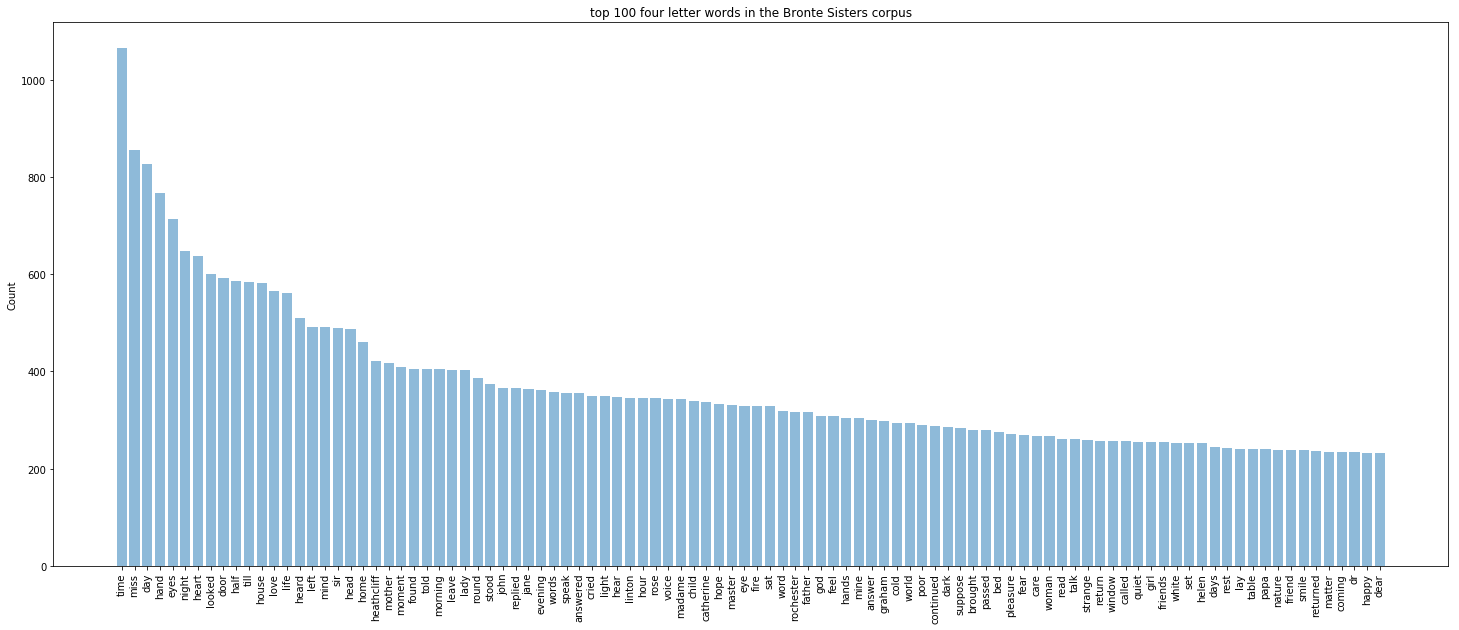

In [114]:
word_freq_as_bar_plot(sorted_freq_count_bronte, "Bronte Sisters", 100)

To compare the two writers using word frequencies, we need to convert the frequency count to proportions.

In [ ]:
# add up all the frequencies to get total word count
# then create a new array of tuples with each tuple being word,proportion
# where proportion is simply word count divided by total word count
words_bronte = set([w for w,c in sorted_freq_count_bronte])


In [118]:
word_count_bronte = sum([c for w,c in sorted_freq_count_bronte])
sorted_word_proportions_bronte = [(w, c/word_count_bronte) for w,c in sorted_freq_count_bronte]
sorted_word_proportions_bronte

[('time', 0.004242419413948597),
 ('miss', 0.0034058860083812682),
 ('day', 0.0032943482209722907),
 ('hand', 0.003059322168931946),
 ('eyes', 0.002840230086521455),
 ('night', 0.002577319587628866),
 ('heart', 0.002541468155961695),
 ('looked', 0.002394078936885546),
 ('door', 0.002358227505218375),
 ('half', 0.002334326550773594),
 ('till', 0.002326359565958667),
 ('house', 0.00231839258114374),
 ('love', 0.002254656702624325),
 ('life', 0.0022347392405870073),
 ('heard', 0.0020315811278063703),
 ('left', 0.001959878264472028),
 ('mind', 0.0019558947720645643),
 ('sir', 0.0019479277872496376),
 ('head', 0.0019399608024347106),
 ('home', 0.0018363899998406603),
 ('heathcliff', 0.0016770503035421214),
 ('mother', 0.0016611163339122677),
 ('moment', 0.0016292483946525598),
 ('found', 0.0016133144250227059),
 ('told', 0.0016133144250227059),
 ('morning', 0.0016133144250227059),
 ('leave', 0.0016093309326152424),
 ('lady', 0.0016053474402077789),
 ('round', 0.0015376280692809),
 ('stood',

In [116]:


words_ja = set([w for w,c in sorted_freq_count_ja])
word_count_ja = sum([c for w,c in sorted_freq_count_ja])
sorted_word_proportions_ja = [(w, c/word_count_ja) for w,c in sorted_freq_count_ja]
#sorted_word_proportions_ja

In [117]:
common_words = [w for w in words_bronte if w in words_ja ]
print("there are %d common words out of a total of %d words in JA and %d words in Bronte" %(len(common_words), len(words_ja), len(words_bronte)))

there are 8108 common words out of a total of 10485 words in JA and 23050 words in Bronte


Now lets proportions of these common words in both datasets to see if they are correlated

In [94]:
cw_prop_bronte = [[p for w,p in sorted_word_proportions_bronte if w == cw][0] for cw in common_words]
cw_prop_ja = [[p for w,p in sorted_word_proportions_ja if w == cw][0] for cw in common_words]
cw_word_proportions = pd.DataFrame({'cw':common_words, 'ja':cw_prop_ja, 'bronte':cw_prop_bronte})


In [96]:
cw_word_proportions.head(20)

,bronte,cw,ja
0,0.000076,eleven,0.000018
1,0.000020,scotland,0.000012
2,0.000127,thy,0.000012
3,0.000040,strongest,0.000080
4,0.000068,prolonged,0.000006
5,0.000020,subordinate,0.000006
6,0.000044,deprived,0.000031
7,0.000072,process,0.000024
8,0.000036,medical,0.000012
9,0.000100,confused,0.000055


In [97]:
import numpy
numpy.corrcoef(cw_prop_bronte, cw_prop_ja)[0, 1]

0.7245858548128689

### Homework
1. Generate wordclouds for both JA and Bronte and see if you can visually see similarities between both the corpuses.